<a href="https://colab.research.google.com/github/PauloHFS/descriptive-data-analysis-2023-1/blob/main/Lab2A_EDA%2C_Histogramas%2C_Sumarizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CDD - Lab2

EDA, Histogramas, Sumarizacao.ipynb

## Instruções

Individual, em dupla ou em grupos de 3 alunos.

Quando for feito por mais de um aluno:

*   Todos enviam uma cópia idêntica; OU
*   Um aluno envia uma cópia completa e os demais enviam uma cópia vazia, indicando apenas o grupo e onde está a solução (informe isso na próxima célula).

**Implementações Extras.**
Implemente apenas o que é pedido (a quantidade de gráficos, por exemplo). Caso queria implementar algo mais, deixe separado no final do notebook (existe uma seção de rascunho já criada para isso).

**Implementação em duas etapas.** Parte A: do início até antes de "correlação".  Parte B: correlação será implementada apenas na próxima semana, após a aula sobre o assunto.




# Parte A

## Preencher:

**Aluno(as):** Paulo Hernane Fontes e Silva - 119210311

**Forma de Envio (escolha uma das linhas a seguir e apague as demais):** Esta atividade foi feita individulamente (não fiz em grupo).

## Datsets

1. Rain in Australia

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

2. Student Food Survey

https://www.kaggle.com/mlomuscio/student-food-survey

3. Students Performance in Exams

https://www.kaggle.com/spscientist/students-performance-in-exams

### Informe aqui o datset escolhido: 3


## Imports

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carregando o dataset

In [68]:
df = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv", verbose=True)

Tokenization took: 0.65 ms
Type conversion took: 0.83 ms
Parser memory cleanup took: 0.01 ms


## Inspeção Inicial dos Dados, Pré-processamento, limpeza, transformações, etc

Fique à vontade para criar descrições aninhadas aqui. Para ficarem aninhados, use títulos markdown de 3o nível (###) em diante.

## Analisando as variáveis

In [69]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [71]:
df.shape

(1000, 8)

In [72]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [75]:
df['race/ethnicity'].value_counts(sort=True).sort_index()

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

In [76]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [77]:
# set some high school to high school
df.loc[df['parental level of education'] == 'some high school', 'parental level of education'] = 'high school'

# Eu não sei como distribuir na mesma frequencia o some degree entre os outros!

In [78]:
df['parental level of education'].value_counts()

high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [79]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [80]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [81]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Análise inicial das variaveis

- Não há valores `null` nem linhas duplicadas;
- `parental level of education` é uma variável categorica ordinal;
- as variáveis do tipo `score` são do tipo quantitativa continua;
- o resto das variaveis são do tipo categorica nomial;

## Histogramas

**As análises daqui por diante podem ser do datset inteiro ou de um recorte deles (e.g, análise para uma determinada região, gênero, etc).**

Plote 2 a 5 histogramas que julgar interessantes. Uma boa escolha pode ser para situações onde a distribuição observada não está bem alinhada com o que você imaginou inicialmente. Nas células markdown que antedecem os gráficos, comente brevemente o que foi plotado/observado.



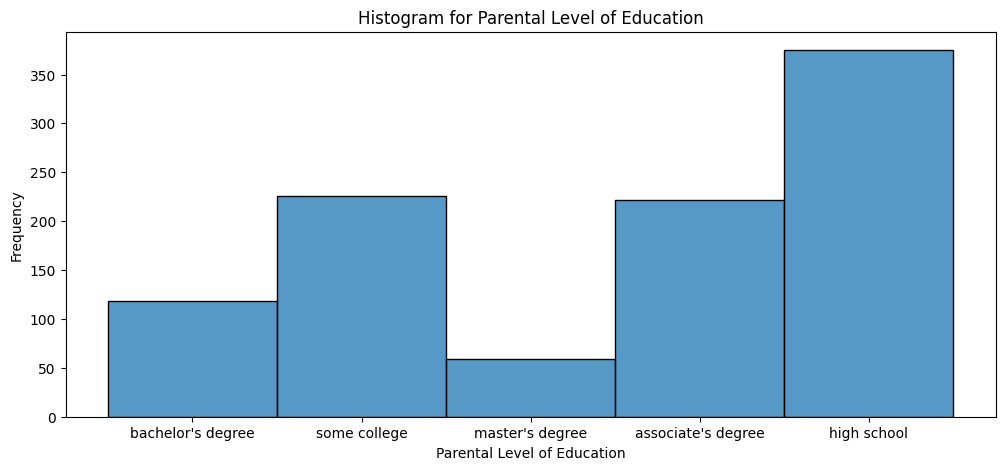

In [82]:
plt.figure(figsize=(12,5))
sns.histplot(df['parental level of education'], bins='auto', stat='frequency')
plt.title('Histogram for Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Frequency')
plt.show()

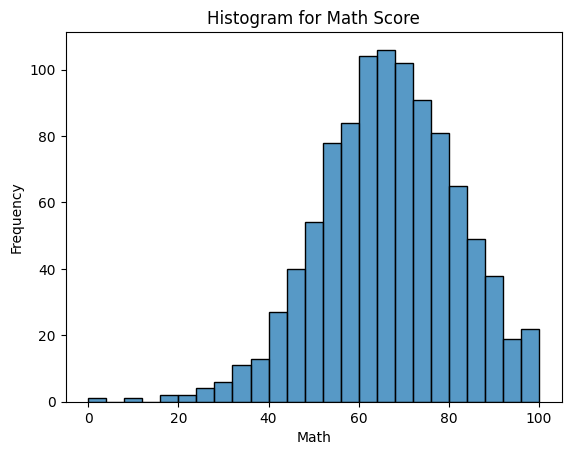

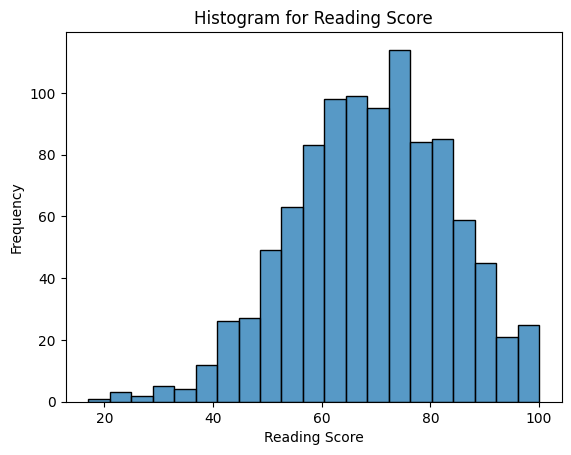

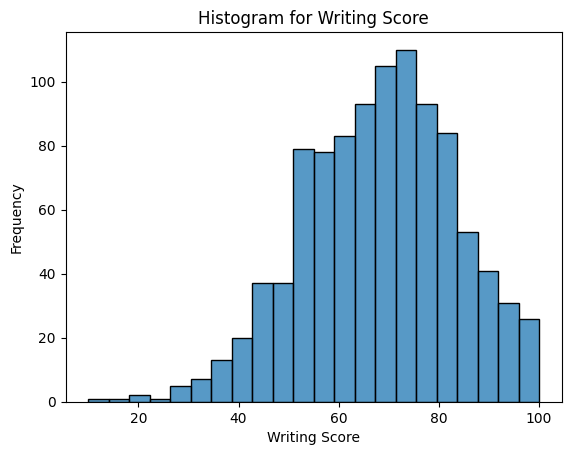

In [83]:
sns.histplot(df['math score'], bins='auto', kde=False)
plt.title('Histogram for Math Score')
plt.xlabel('Math')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['reading score'], bins='auto', kde=False)
plt.title('Histogram for Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['writing score'], bins='auto', kde=False)
plt.title('Histogram for Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

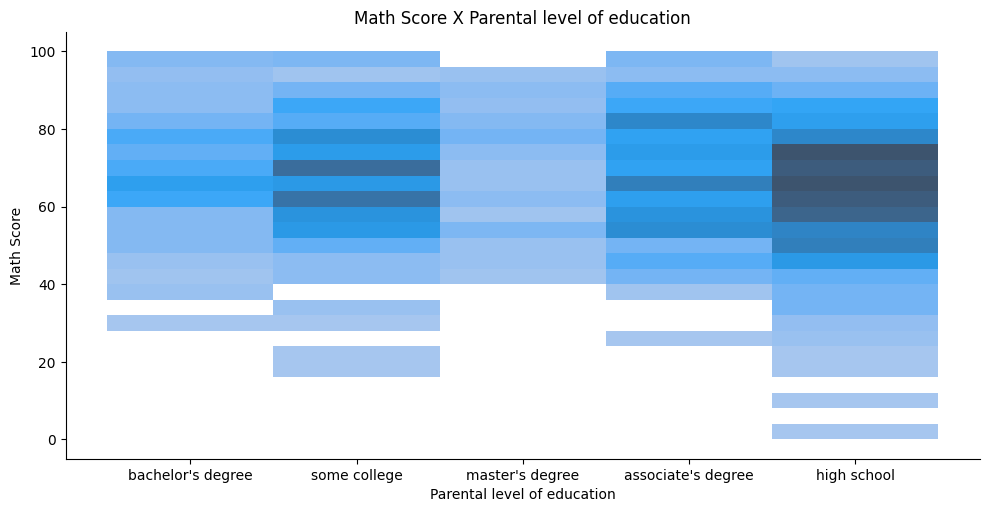

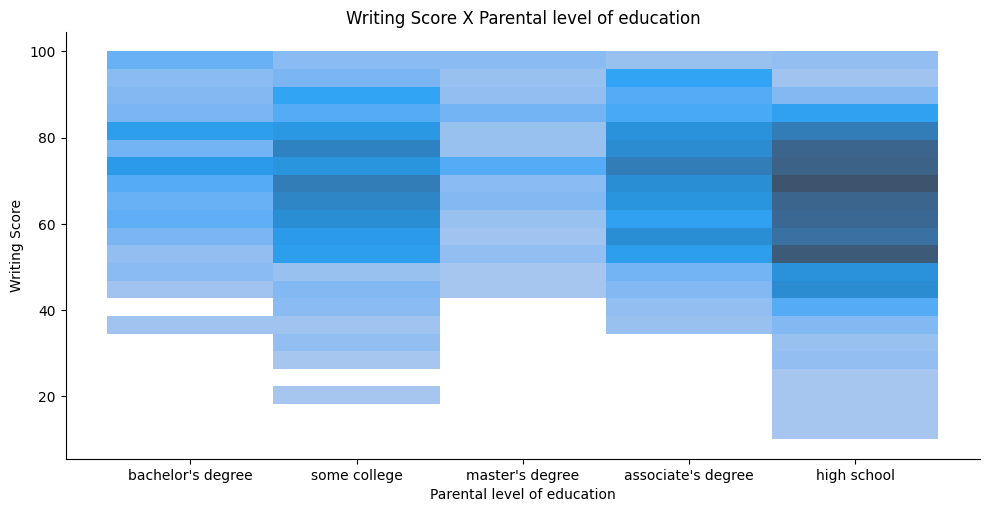

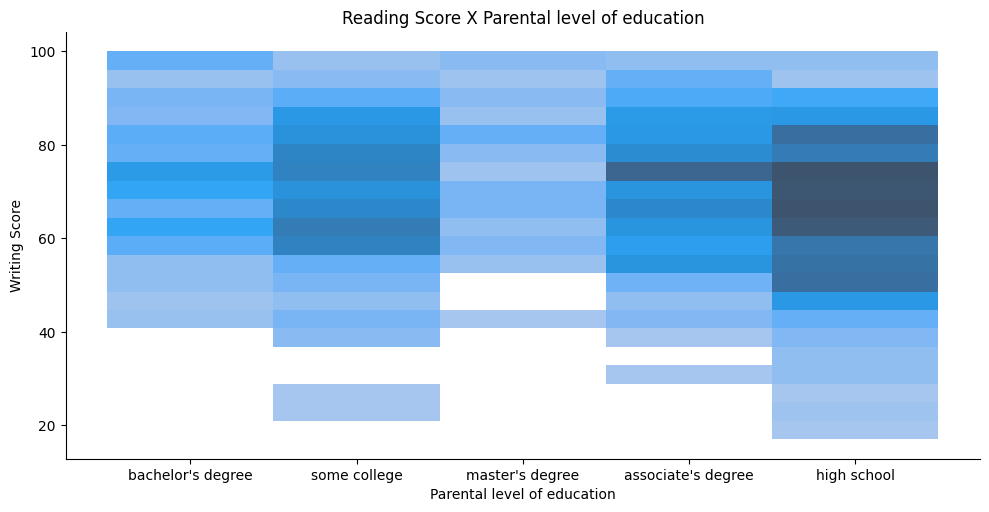

In [84]:
sns.displot(df, y='math score', x='parental level of education', bins='auto', aspect=2.0)
plt.title('Math Score X Parental level of education')
plt.xlabel('Parental level of education')
plt.ylabel('Math Score')
plt.show()

sns.displot(df, y='writing score', x='parental level of education', bins='auto', aspect=2.0)
plt.title('Writing Score X Parental level of education')
plt.xlabel('Parental level of education')
plt.ylabel('Writing Score')
plt.show()

sns.displot(df, y='reading score', x='parental level of education', bins='auto', aspect=2.0)
plt.title('Reading Score X Parental level of education')
plt.xlabel('Parental level of education')
plt.ylabel('Writing Score')
plt.show()

### Observações
- Como se preve de uma váriavel desse tipo, as variaveis `score` seguem a distribuição normal.
- Ao se plotar o `score` pelo grau de estudo dos pais, podemos observar a tendência de `notas < 60` diminuir conforme maior o nivel de educação dos pais.



## Gráficos de dispersão, boxplots, violinplots

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Plote 2 a 5 gráficos que julgar interessantes.

Procure fazer comparações (colocar 2 ou mais boxplot lado a lado, por exemplo).

Procure usar algumas visualizações um pouco diferentes daquelas vistas em sala. Por exemplo. gráficos que misturam pontos com boxplot ou violinplots. Algumas sugestões estão em um capítulo de livro postado no classroom (do livro Fundamentals of Data Visualization, de Claus O. Wilke).

Procure identificar situações pouco esperadas / menos óbvias, pois, se conseguir, isso será um grande diferencial.

Deixe comentários em markdown nas células que entecedem os gráficos.



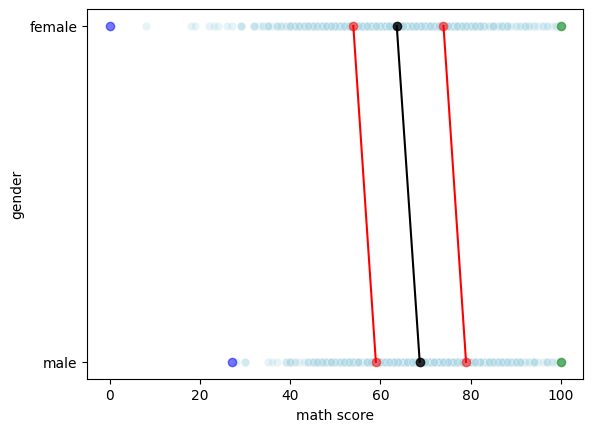

In [125]:
df_min_score = df.groupby(['gender']).agg({'math score': min}).reset_index()
df_max_score = df.groupby(['gender']).agg({'math score': max}).reset_index()
df_25_revenue = df.groupby(['gender'])['math score'].quantile(0.25).reset_index()
df_75_revenue = df.groupby(['gender'])['math score'].quantile(0.75).reset_index()
df_mean_score = df.groupby(['gender'])['math score'].mean().reset_index()

sns.scatterplot(x=df['math score'], y=df['gender'], alpha=0.3, color="lightblue")
plt.scatter(x=df_min_score['math score'], y=df_min_score['gender'], alpha=0.5, color="blue")
plt.scatter(x=df_max_score['math score'], y=df_max_score['gender'], alpha=0.5, color="green")
plt.scatter(x=df_25_revenue['math score'], y=df_25_revenue['gender'], alpha=0.5, color="red")
plt.scatter(x=df_75_revenue['math score'], y=df_75_revenue['gender'], alpha=0.5, color="red")
plt.scatter(x=df_mean_score['math score'], y=df_mean_score['gender'], alpha=0.8, color="black")
plt.plot(df_25_revenue['math score'], df_25_revenue['gender'], color="red")
plt.plot(df_75_revenue['math score'], df_75_revenue['gender'], color="red")
plt.plot(df_mean_score['math score'], df_mean_score['gender'], color="black")

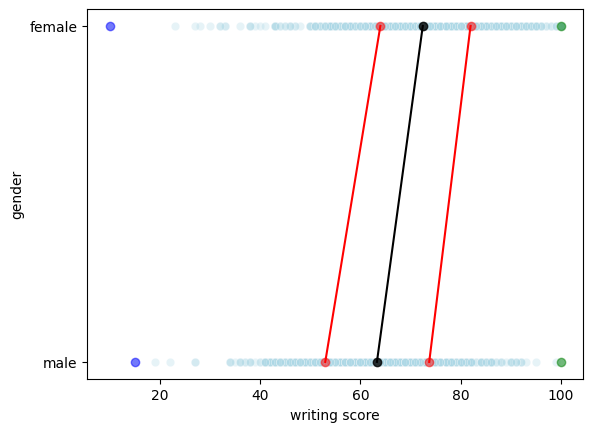

In [126]:
df_min_score = df.groupby(['gender']).agg({'writing score': min}).reset_index()
df_max_score = df.groupby(['gender']).agg({'writing score': max}).reset_index()

df_25_revenue = df.groupby(['gender'])['writing score'].quantile(0.25).reset_index()
df_75_revenue = df.groupby(['gender'])['writing score'].quantile(0.75).reset_index()

df_mean_score = df.groupby(['gender'])['writing score'].mean().reset_index()

sns.scatterplot(x=df['writing score'], y=df['gender'], alpha=0.3, color="lightblue")
plt.scatter(x=df_min_score['writing score'], y=df_min_score['gender'], alpha=0.5, color="blue")
plt.scatter(x=df_max_score['writing score'], y=df_max_score['gender'], alpha=0.5, color="green")
plt.scatter(x=df_25_revenue['writing score'], y=df_25_revenue['gender'], alpha=0.5, color="red")
plt.scatter(x=df_75_revenue['writing score'], y=df_75_revenue['gender'], alpha=0.5, color="red")
plt.scatter(x=df_mean_score['writing score'], y=df_mean_score['gender'], alpha=0.8, color="black")
plt.plot(df_25_revenue['writing score'], df_25_revenue['gender'], color="red")
plt.plot(df_75_revenue['writing score'], df_75_revenue['gender'], color="red")
plt.plot(df_mean_score['writing score'], df_mean_score['gender'], color="black")

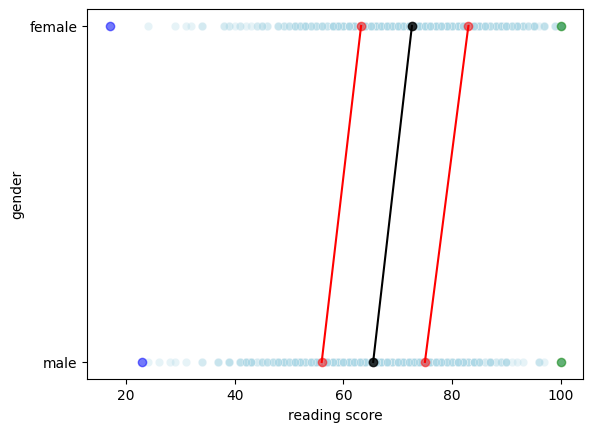

In [127]:
df_min_score = df.groupby(['gender']).agg({'reading score': min}).reset_index()
df_max_score = df.groupby(['gender']).agg({'reading score': max}).reset_index()

df_25_revenue = df.groupby(['gender'])['reading score'].quantile(0.25).reset_index()
df_75_revenue = df.groupby(['gender'])['reading score'].quantile(0.75).reset_index()

df_mean_score = df.groupby(['gender'])['reading score'].mean().reset_index()

sns.scatterplot(x=df['reading score'], y=df['gender'], alpha=0.3, color="lightblue")
plt.scatter(x=df_min_score['reading score'], y=df_min_score['gender'], alpha=0.5, color="blue")
plt.scatter(x=df_max_score['reading score'], y=df_max_score['gender'], alpha=0.5, color="green")
plt.scatter(x=df_25_revenue['reading score'], y=df_25_revenue['gender'], alpha=0.5, color="red")
plt.scatter(x=df_75_revenue['reading score'], y=df_75_revenue['gender'], alpha=0.5, color="red")
plt.scatter(x=df_mean_score['reading score'], y=df_mean_score['gender'], alpha=0.8, color="black")
plt.plot(df_25_revenue['reading score'], df_25_revenue['gender'], color="red")
plt.plot(df_75_revenue['reading score'], df_75_revenue['gender'], color="red")
plt.plot(df_mean_score['reading score'], df_mean_score['gender'], color="black")

<Axes: xlabel='gender', ylabel='math score'>

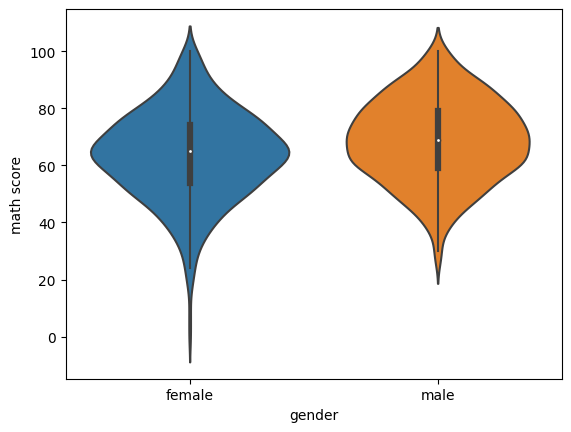

In [131]:
sns.violinplot(x='gender', y='math score', data=df)

<Axes: xlabel='gender', ylabel='writing score'>

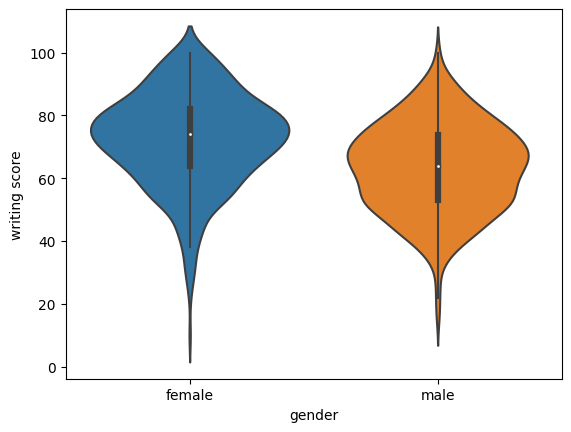

In [132]:
sns.violinplot(x='gender', y='writing score', data=df)

<Axes: xlabel='gender', ylabel='reading score'>

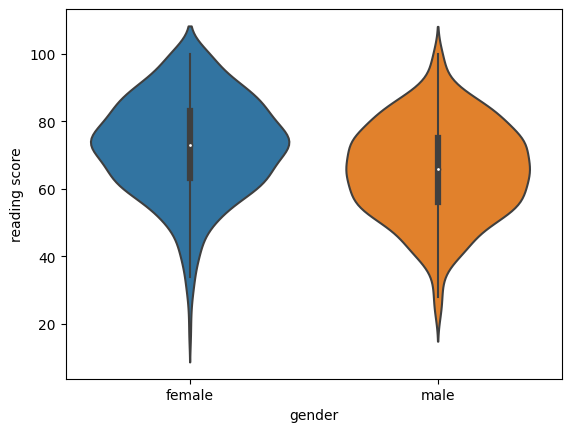

In [133]:
sns.violinplot(x='gender', y='reading score', data=df)

## Observações

- `male` em média pontuam muito bem `math score` e não possuem uma dispersão muito grande das notas;
- Em contra partida `female` pontuam mais que `male` em `writing score` e `reading score` porem possuem uma distribuição maior nas pontuações;

# Parte B

## Correlações

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Procure por correlações nos dados e mostre os valores encontrados. Fique à vontade para plotar gráficos antes de calcular a correlação, caso ache útil.

Justifique a estratégia utilizada para calcular.

Basta mostrar de 2 a 5 situações investigadas.

Lembre-se de comentar seus achados. Por exemplo:

*   Se a correlação encontrada foi relevante (se não é muito óbvia).
*   Ou se você esperaria ver uma correlação entre duas variáveis mas os dados não confirmaram. Ou seja, alguns dos itens que você vai adicionar ao notebook pode não ser uma correlação que encontrou, mas sim a confirmação de uma ausência de correlação.


Deixe comentários em markdown nas células que entecedem os códigos / gráficos.



### XXX

In [88]:
# XXX

# Implementações EXTRAS / RASCUNHO

Caso tenha implementado mais coisas do que foi pedido, coloque-as a partir deste ponto, para deixar a parte anterior mais limpa.

Fique totalmente à vontade para colocar qualquer coisa aqui, com ou sem comentários. É como o rascunho de uma prova... não será corrigido.

In [89]:
def plot_heat_map(corr_matrix):
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

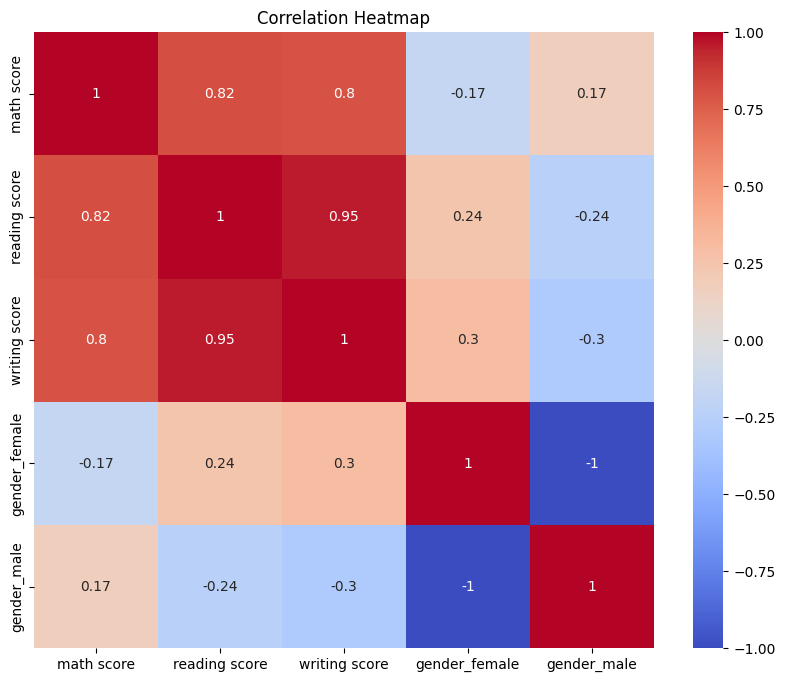

In [90]:
plot_heat_map(pd.get_dummies(df[['math score', 'reading score', 'writing score', 'gender']]).corr())

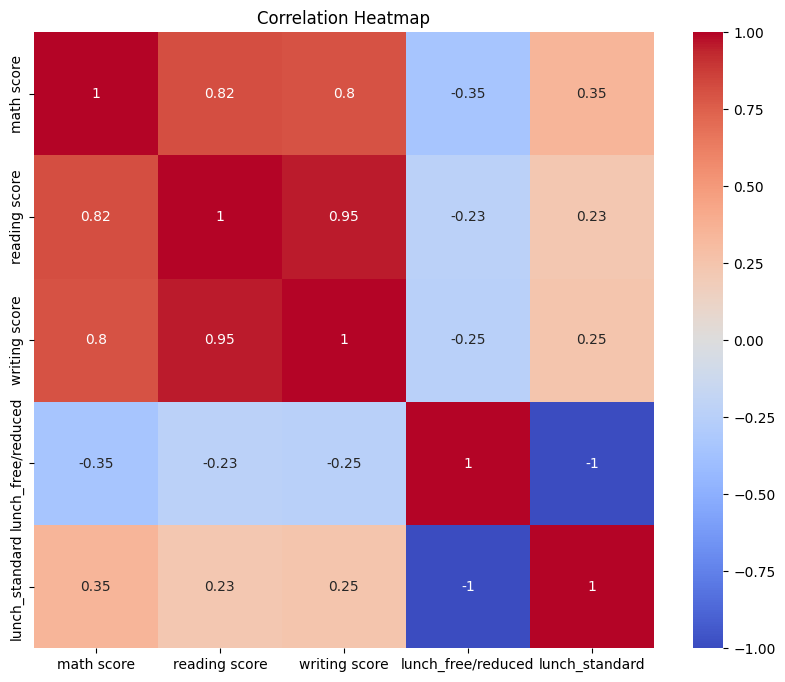

In [91]:
plot_heat_map(pd.get_dummies(df[['math score', 'reading score', 'writing score', 'lunch']]).corr())

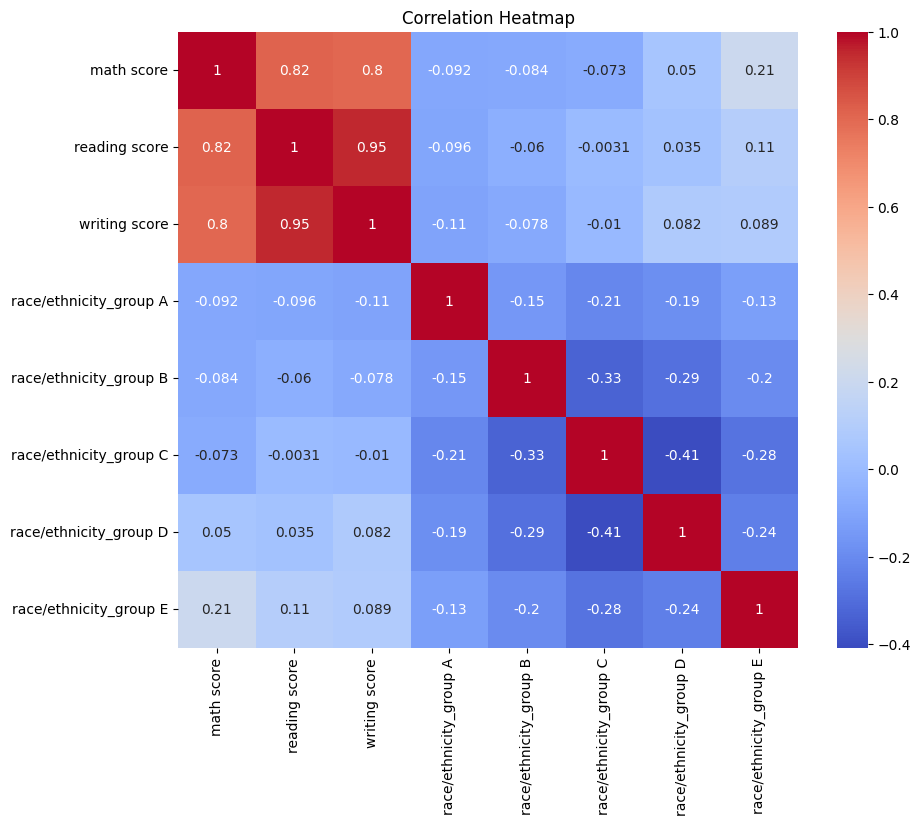

In [92]:
plot_heat_map(pd.get_dummies(df[['math score', 'reading score', 'writing score', 'race/ethnicity']]).corr())

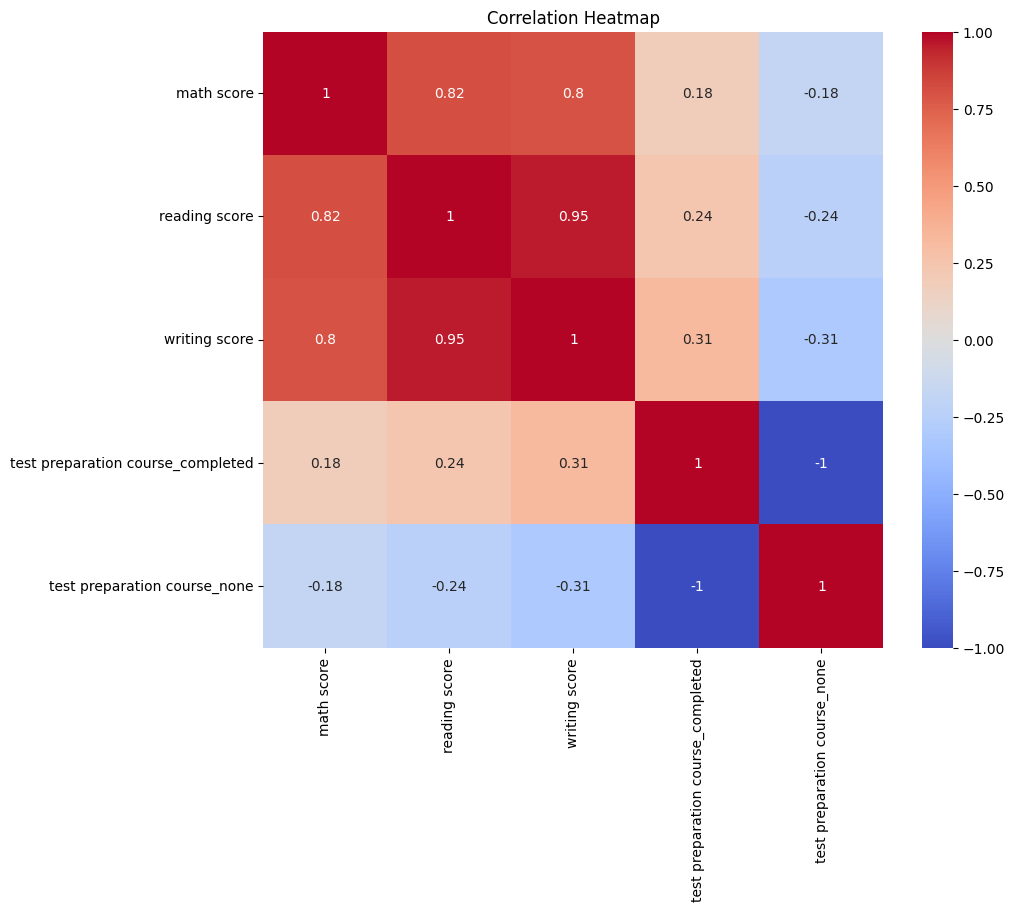

In [93]:
plot_heat_map(pd.get_dummies(df[['math score', 'reading score', 'writing score', 'test preparation course']]).corr())

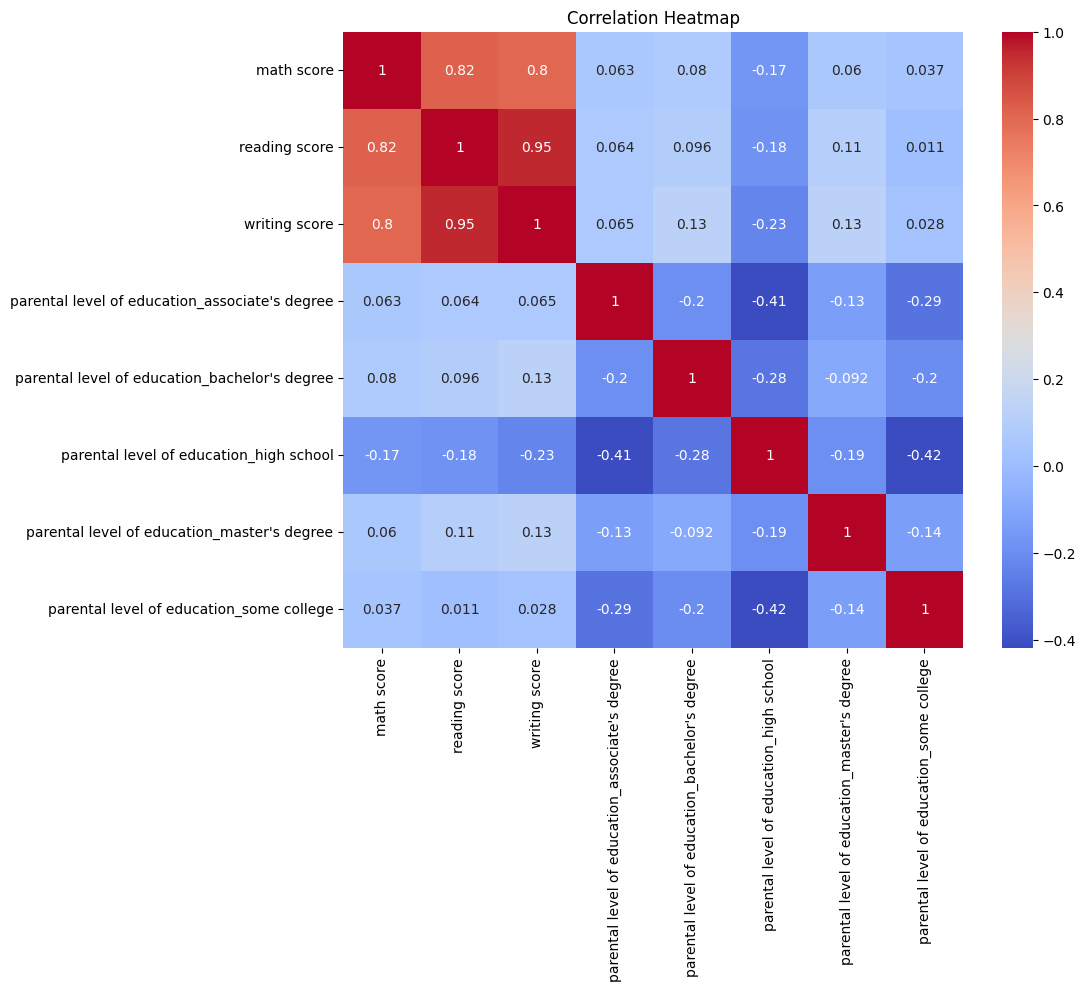

In [94]:
plot_heat_map(pd.get_dummies(df[['math score', 'reading score', 'writing score', 'parental level of education']]).corr())